**_Adventures in Data_: Homicide** <br>
**Chapter 2: Evaluating Simple Machine Learning Models**

## Shuffle and split the data

In [3]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0, stratify=df["disposition"])

In [4]:
train_set["disposition"].unique()

array(['Closed by arrest', 'Open/No arrest', 'Closed without arrest'],
      dtype=object)

## Exploratory data analysis

In [5]:
train_set.sample(10)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
25253,Jac-000855,20140325,JACKSON,KENNETH,White,22,Male,Jacksonville,FL,30.367063,-81.496930,Closed by arrest
13951,Col-000501,20110416,GABBERT,MICHAEL,White,42,Male,Columbus,OH,39.959429,-83.035571,Open/No arrest
6354,Buf-000520,20131213,STEIN,JOHN,White,19,Male,Buffalo,NY,42.947226,-78.904404,Open/No arrest
46438,Sav-000255,20141220,ASHLEY,ROMONDO,Black,22,Male,Savannah,GA,32.058300,-81.076700,Closed by arrest
42060,Phi-004059,20080902,RIVERA,ANTONIO,Hispanic,37,Male,Philadelphia,PA,39.996314,-75.139063,Open/No arrest
18162,Det-001750,20121119,JONES,BOBBY,Black,55,Male,Detroit,MI,42.441918,-83.223884,Open/No arrest
44135,Pit-000172,20150916,NELSON,JAMAR,Black,30,Male,Pittsburgh,PA,40.411615,-80.020345,Closed by arrest
42508,Phi-004507,20120912,PERRY,STEVEN,Black,51,Male,Philadelphia,PA,39.992461,-75.129719,Open/No arrest
35075,Min-000242,20140809,TONEY,DION DARNELL NATH,Black,27,Male,Minneapolis,MN,44.982890,-93.275360,Open/No arrest
51800,Was-000998,20080830,HENRY,MICHAEL,Black,25,Male,Washington,DC,38.846603,-76.972814,Closed by arrest


In [6]:
def transform_dataframe (data):
    
    df_transformed = data.drop(columns=["uid", "victim_last", "victim_first", "state", "city"]).copy()
    
    df_transformed["reported_date"] = pd.to_datetime(df_transformed["reported_date"].map(lambda d: f"{str(d)[:4]}-{str(d)[4:6]}-{str(d)[-2:]}"))
    max_date = df_transformed["reported_date"].max()
    df_transformed["month"] = df_transformed["reported_date"].dt.month_name().astype("category")
    df_transformed["weekday"] = df_transformed["reported_date"].dt.day_name().astype("category")
    df_transformed["delta_days"] = ((max_date - df_transformed["reported_date"]).dt.total_seconds() / (60 * 60 * 24)).astype(int)
    
    df_transformed["victim_race"] = df_transformed["victim_race"].astype("category")
    df_transformed["victim_age"] = df_transformed["victim_age"].map(lambda s: np.nan if not str(s).isnumeric() else s)
    df_transformed["victim_sex"] = df_transformed["victim_sex"].astype("category")
    df_transformed["disposition"] = df_transformed["disposition"].astype("category")
    
    return df_transformed

In [7]:
train_set_transformed = transform_dataframe(train_set)

In [8]:
train_set_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41743 entries, 36067 to 2873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  41743 non-null  datetime64[ns]
 1   victim_race    41743 non-null  category      
 2   victim_age     39349 non-null  float64       
 3   victim_sex     41743 non-null  category      
 4   lat            41691 non-null  float64       
 5   lon            41691 non-null  float64       
 6   disposition    41743 non-null  category      
 7   month          41743 non-null  category      
 8   weekday        41743 non-null  category      
 9   delta_days     41743 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 2.0 MB


array([[<Axes: title={'center': 'reported_date'}>,
        <Axes: title={'center': 'victim_age'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'delta_days'}>, <Axes: >]], dtype=object)

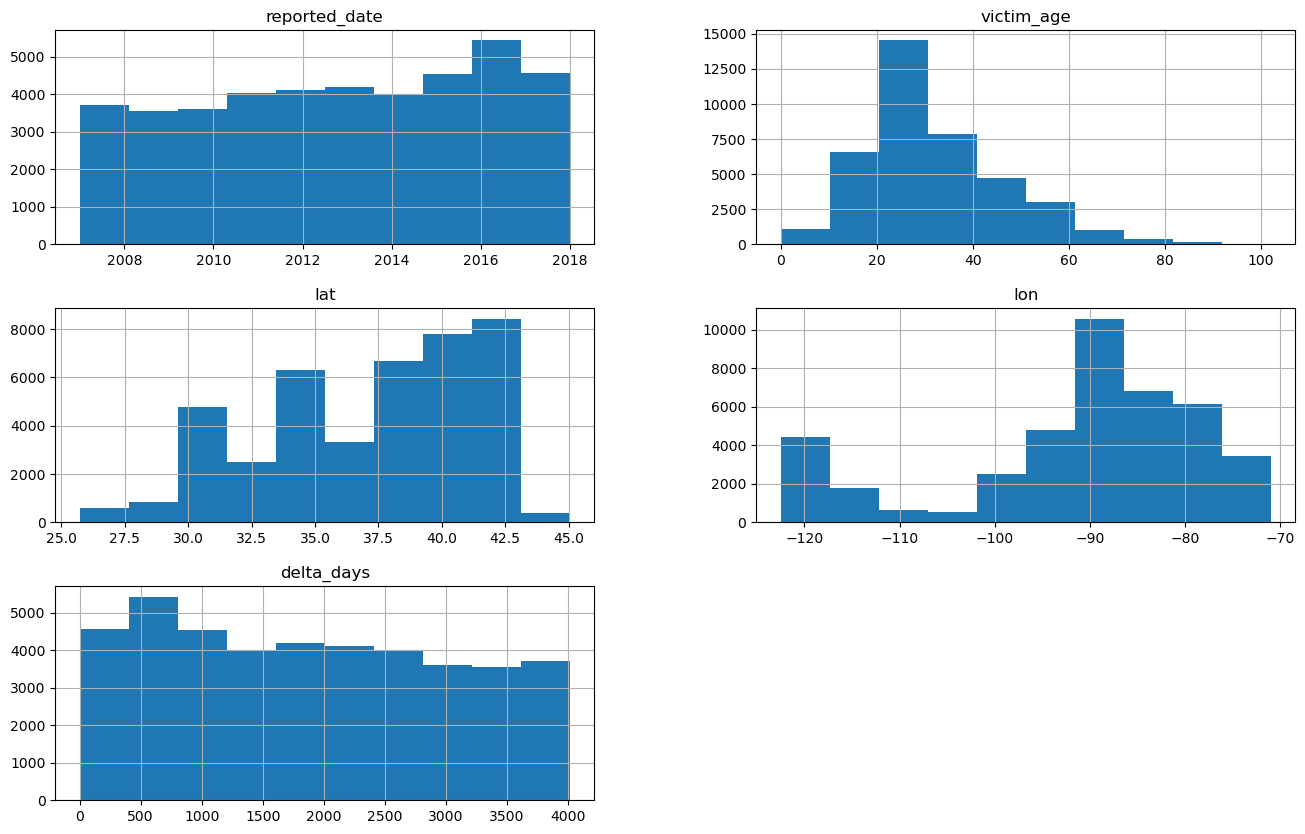

In [9]:
train_set_transformed.hist(figsize=(16, 10))

In [10]:
train_set_transformed.describe()

,reported_date,victim_age,lat,lon,delta_days
count,41743,39349.000000,41691.000000,41691.000000,41743.000000
mean,2012-11-03 16:08:31.932539648,31.813871,37.012092,-91.496989,1883.327408
min,2007-01-01 00:00:00,0.000000,25.725214,-122.504604,0.000000
25%,2010-03-17 00:00:00,22.000000,33.762747,-96.024247,836.000000
50%,2012-12-15 00:00:00,28.000000,38.485033,-87.710581,1842.000000
75%,2015-09-17 00:00:00,40.000000,40.026592,-81.764802,2846.000000
max,2017-12-31 00:00:00,102.000000,45.051190,-71.011519,4017.000000
std,NaN,14.420488,4.354569,13.768301,1164.140315


In [11]:
train_set_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41743 entries, 36067 to 2873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  41743 non-null  datetime64[ns]
 1   victim_race    41743 non-null  category      
 2   victim_age     39349 non-null  float64       
 3   victim_sex     41743 non-null  category      
 4   lat            41691 non-null  float64       
 5   lon            41691 non-null  float64       
 6   disposition    41743 non-null  category      
 7   month          41743 non-null  category      
 8   weekday        41743 non-null  category      
 9   delta_days     41743 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 2.0 MB


## Impute and transform data

In [12]:
imputer = SimpleImputer(strategy = "median")

In [16]:
train_set_transformed["victim_age"] = imputer.fit_transform(train_set_transformed["victim_age"].values.reshape(-1, 1))
train_set_transformed["lat"] = imputer.fit_transform(train_set_transformed["lat"].values.reshape(-1, 1))
train_set_transformed["lon"] = imputer.fit_transform(train_set_transformed["lon"].values.reshape(-1, 1))

In [17]:
train_set_transformed.describe()

,reported_date,victim_age,lat,lon,delta_days
count,41743,41743.000000,41743.000000,41743.000000,41743.000000
mean,2012-11-03 16:08:31.932539648,31.595142,37.013926,-91.492272,1883.327408
min,2007-01-01 00:00:00,0.000000,25.725214,-122.504604,0.000000
25%,2010-03-17 00:00:00,22.000000,33.763642,-96.016193,836.000000
50%,2012-12-15 00:00:00,28.000000,38.485033,-87.710581,1842.000000
75%,2015-09-17 00:00:00,39.000000,40.025915,-81.773613,2846.000000
max,2017-12-31 00:00:00,102.000000,45.051190,-71.011519,4017.000000
std,NaN,14.028913,4.352166,13.760370,1164.140315


In [18]:
train_set_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41743 entries, 36067 to 2873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  41743 non-null  datetime64[ns]
 1   victim_race    41743 non-null  category      
 2   victim_age     41743 non-null  float64       
 3   victim_sex     41743 non-null  category      
 4   lat            41743 non-null  float64       
 5   lon            41743 non-null  float64       
 6   disposition    41743 non-null  category      
 7   month          41743 non-null  category      
 8   weekday        41743 non-null  category      
 9   delta_days     41743 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 2.0 MB


In [19]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

<Axes: xlabel='month'>

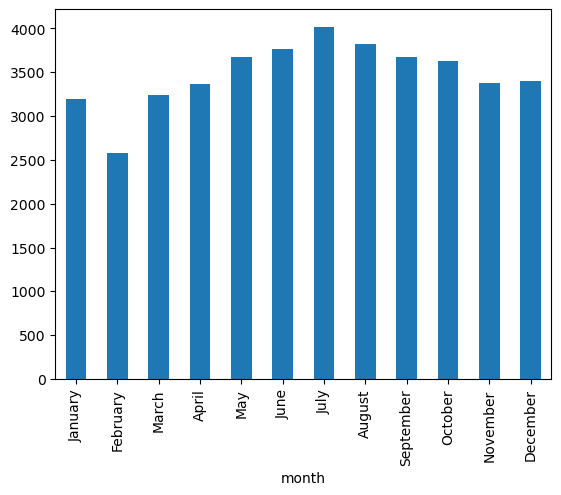

In [20]:
train_set_transformed.groupby("month").size()[months].plot.bar()

In [21]:
weekdays = [
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
]

<Axes: xlabel='weekday'>

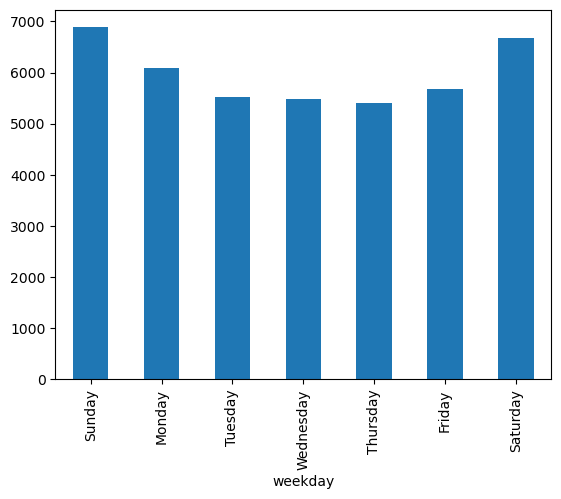

In [22]:
train_set_transformed.groupby("weekday").size()[weekdays].plot(kind="bar")

<Axes: >

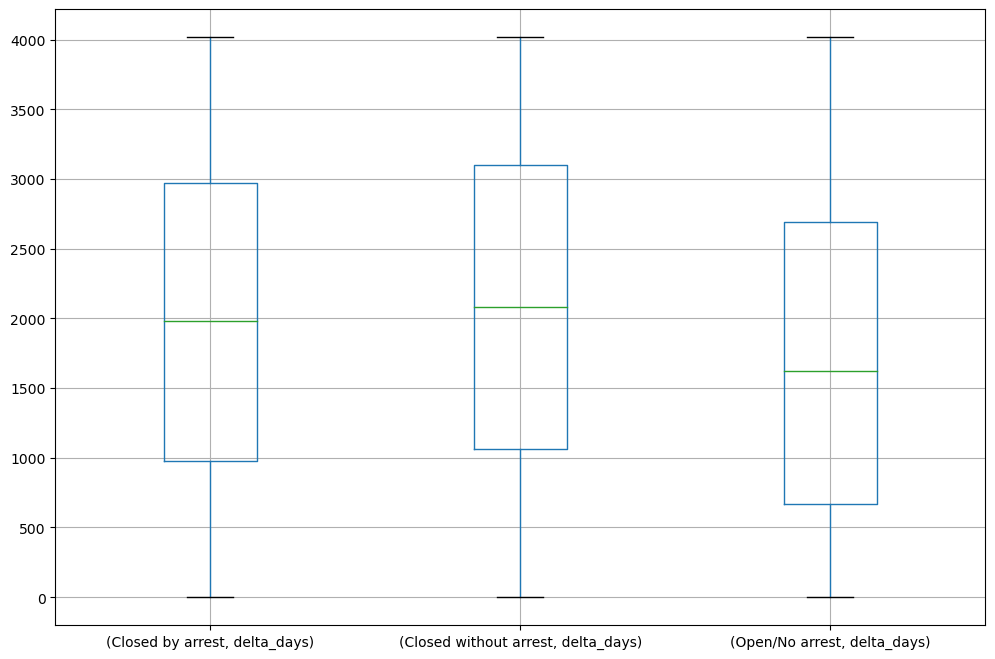

In [23]:
train_set_transformed[["delta_days", "disposition"]].groupby("disposition").boxplot(subplots=False, figsize=(12, 8))

In [24]:
onehot_encoder = OneHotEncoder(sparse_output = False)

In [25]:
train_set_onehot = train_set_transformed[["victim_race", "victim_sex", "month", "weekday"]]

In [26]:
train_set_onehot_array = onehot_encoder.fit_transform(train_set_onehot)

In [27]:
train_set_onehot_array

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [28]:
train_set_onehot = pd.DataFrame(train_set_onehot_array,
                               columns = onehot_encoder.get_feature_names_out(),
                               index = train_set_onehot.index).astype(int)

In [29]:
train_set_onehot

,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_Unknown,victim_race_White,victim_sex_Female,victim_sex_Male,victim_sex_Unknown,month_April,...,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
36067,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12917,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
5483,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
39001,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
37081,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9161,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
18740,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
29227,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
train_set_num = train_set_transformed[["victim_age", "lat", "lon", "delta_days"]]

In [31]:
min_max_scaler = MinMaxScaler()

In [32]:
train_set_num_scaled = min_max_scaler.fit_transform(train_set_num)

In [33]:
train_set_num_scaled

array([[0.2745098 , 0.22469475, 0.63231302, 0.68732885],
       [0.29411765, 0.6946561 , 0.73705368, 0.79138661],
       [0.21568627, 0.85879285, 0.99814447, 0.19218322],
       ...,
       [0.34313725, 0.86287903, 0.76672947, 0.02439632],
       [0.20588235, 0.43119096, 0.08226161, 0.54045307],
       [0.20588235, 0.70181928, 0.89072957, 0.39880508]])

In [34]:
train_set_num = pd.DataFrame(train_set_num_scaled,
                            columns = min_max_scaler.get_feature_names_out(),
                            index = train_set_num.index)

In [35]:
train_set_num

,victim_age,lat,lon,delta_days
36067,0.274510,0.224695,0.632313,0.687329
12917,0.294118,0.694656,0.737054,0.791387
5483,0.215686,0.858793,0.998144,0.192183
39001,0.166667,0.505719,0.483992,0.954941
37081,0.450980,0.219693,0.628950,0.165297
...,...,...,...,...
30047,0.264706,0.430658,0.082213,0.200149
9161,0.009804,0.826458,0.677375,0.609908
18740,0.343137,0.862879,0.766729,0.024396
29227,0.205882,0.431191,0.082262,0.540453


In [36]:
train_set_complete = pd.concat((train_set_onehot, train_set_num), axis = 1)

In [37]:
train_set_complete

,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_Unknown,victim_race_White,victim_sex_Female,victim_sex_Male,victim_sex_Unknown,month_April,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,victim_age,lat,lon,delta_days
36067,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.274510,0.224695,0.632313,0.687329
12917,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0.294118,0.694656,0.737054,0.791387
5483,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.215686,0.858793,0.998144,0.192183
39001,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.166667,0.505719,0.483992,0.954941
37081,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.450980,0.219693,0.628950,0.165297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.264706,0.430658,0.082213,0.200149
9161,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0.009804,0.826458,0.677375,0.609908
18740,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.343137,0.862879,0.766729,0.024396
29227,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0.205882,0.431191,0.082262,0.540453


## Make pipelines

In [38]:
num_pipeline = Pipeline([
    ("impute", imputer),
    ("normalize", min_max_scaler)
])

onehot_pipeline  = Pipeline([
    ("onehot", onehot_encoder)
])

preprocessing = ColumnTransformer([
    ("numeric", num_pipeline, ["victim_age", "lat", "lon", "delta_days"]),
    ("onehot", onehot_pipeline, ["victim_race", "victim_sex", "month", "weekday"])
])

In [39]:
train_set_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41743 entries, 36067 to 2873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  41743 non-null  datetime64[ns]
 1   victim_race    41743 non-null  category      
 2   victim_age     41743 non-null  float64       
 3   victim_sex     41743 non-null  category      
 4   lat            41743 non-null  float64       
 5   lon            41743 non-null  float64       
 6   disposition    41743 non-null  category      
 7   month          41743 non-null  category      
 8   weekday        41743 non-null  category      
 9   delta_days     41743 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 2.0 MB


In [40]:
train_set_prepared = preprocessing.fit_transform(train_set_transformed.drop("disposition", axis=1))

In [41]:
train_set_prepared.shape

(41743, 32)

In [42]:
preprocessing.get_feature_names_out()

array(['numeric__victim_age', 'numeric__lat', 'numeric__lon',
       'numeric__delta_days', 'onehot__victim_race_Asian',
       'onehot__victim_race_Black', 'onehot__victim_race_Hispanic',
       'onehot__victim_race_Other', 'onehot__victim_race_Unknown',
       'onehot__victim_race_White', 'onehot__victim_sex_Female',
       'onehot__victim_sex_Male', 'onehot__victim_sex_Unknown',
       'onehot__month_April', 'onehot__month_August',
       'onehot__month_December', 'onehot__month_February',
       'onehot__month_January', 'onehot__month_July',
       'onehot__month_June', 'onehot__month_March', 'onehot__month_May',
       'onehot__month_November', 'onehot__month_October',
       'onehot__month_September', 'onehot__weekday_Friday',
       'onehot__weekday_Monday', 'onehot__weekday_Saturday',
       'onehot__weekday_Sunday', 'onehot__weekday_Thursday',
       'onehot__weekday_Tuesday', 'onehot__weekday_Wednesday'],
      dtype=object)

## Select and train a model

In [43]:
from sklearn import set_config

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [44]:
X_train = train_set_transformed.drop(["disposition"], axis=1)
y_train = pd.Series(train_set_transformed["disposition"])

In [45]:
set_config(transform_output="pandas")

In [47]:
decision_tree_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", DecisionTreeClassifier(random_state=0))
])

random_forest_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", RandomForestClassifier(random_state=0))
])

bagging_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", BaggingClassifier(random_state=0))
])

ada_boost_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", AdaBoostClassifier(random_state=0))
])

gradient_boosting_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", GradientBoostingClassifier(random_state=0))
])

In [48]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [55]:
def skfcv (classifier):
    
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in skf.split(X_train, y_train):
        
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        classifier.fit(X_train_fold, y_train_fold)
        
        predictions = classifier.predict(X_test_fold)
        
        if len(s := set(y_test_fold) - set(predictions)) > 0:
            print(s)
        
        precisions.append(precision_score(y_test_fold, predictions, average="weighted"))
        recalls.append(recall_score(y_test_fold, predictions, average="weighted"))
        f1s.append(f1_score(y_test_fold, predictions, average="weighted"))
    
    return pd.DataFrame(data = { "Precision (Weighted)": precisions, "Recall (Weighted)": recalls, "F1 (Weighted)": f1s })

In [56]:
%%time
dtc_scores = skfcv(decision_tree_classifier)

CPU times: total: 3 s
Wall time: 3.14 s


In [57]:
dtc_scores.describe()

,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.524905,0.523153,0.523985
std,0.004018,0.004694,0.004308
min,0.521475,0.519166,0.520313
25%,0.521515,0.519583,0.520974
50%,0.523139,0.520484,0.521270
75%,0.528368,0.528087,0.528397
max,0.530025,0.528447,0.528971


In [60]:
%%time
rfc_scores = skfcv(random_forest_classifier)

CPU times: total: 22.4 s
Wall time: 8.02 s


In [63]:
rfc_scores.describe()

,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.591812,0.592866,0.580692
std,0.003972,0.002734,0.003065
min,0.586997,0.589842,0.578504
25%,0.589150,0.590969,0.578827
50%,0.592061,0.592406,0.579220
75%,0.593606,0.594442,0.581017
max,0.597249,0.596670,0.585891


In [62]:
%%time
bc_scores = skfcv(bagging_classifier)

CPU times: total: 16.4 s
Wall time: 17.4 s


In [64]:
bc_scores.describe()

,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.562808,0.571569,0.560117
std,0.007637,0.007433,0.007829
min,0.549860,0.559468,0.546739
25%,0.563118,0.571993,0.561673
50%,0.564178,0.572883,0.561723
75%,0.568130,0.573670,0.563100
max,0.568755,0.579830,0.567348


In [65]:
%%time
abc_scores = skfcv(ada_boost_classifier)

{'Closed without arrest'}


C:\Users\kash\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Closed without arrest'}


C:\Users\kash\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Closed without arrest'}


C:\Users\kash\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Closed without arrest'}
CPU times: total: 16.7 s
Wall time: 18 s


C:\Users\kash\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
abc_scores.describe()

,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.553908,0.582493,0.564099
std,0.010674,0.005954,0.005370
min,0.540705,0.572952,0.555592
25%,0.548853,0.581457,0.563134
50%,0.554470,0.583184,0.564411
75%,0.555723,0.587016,0.568635
max,0.569791,0.587855,0.568721


In [67]:
%%time
gbc_scores = skfcv(gradient_boosting_classifier)

CPU times: total: 1min 45s
Wall time: 1min 52s


In [68]:
gbc_scores.describe()

,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.610068,0.601729,0.584578
std,0.012758,0.007971,0.007768
min,0.593310,0.591279,0.575015
25%,0.604301,0.595520,0.577582
50%,0.610737,0.604935,0.587969
75%,0.614005,0.606779,0.589977
max,0.627985,0.610133,0.592345


The gradient boosting classifier seems to be the most accurate at predicting disposition.

## Fine-tune models

In [90]:
dtc_params = [{
    "train__criterion": [ "gini", "entropy", "log_loss" ],
    "train__min_samples_split": [ 2, int(np.sqrt(len(X_train))), int(len(X_train) / 2) ],
    "train__max_features": [ None, "sqrt", "log2" ]
}]

rfc_params = [{
    "train__criterion": [ "gini", "entropy", "log_loss" ],
    "train__min_samples_split": [ 2, int(np.sqrt(len(X_train))), int(len(X_train) / 2) ],
    "train__max_features": [ None, "sqrt", "log2" ]
}]

bc_params = [{ "train__n_estimators": [ 5, 10, 20 ] }]

abc_params = [{
    "train__n_estimators": [ 20, 50, 80 ],
    "train__learning_rate": [ 0.5, 1.0, 3.0 ]
}]

gbc_params = [{
    "train__learning_rate": [ 0.1, 0.5, 2 ],
    "train__n_estimators": [ 50, 100, 200 ]
}]

In [76]:
%%time
dtc_grid_search = GridSearchCV(decision_tree_classifier, dtc_params, scoring="f1_weighted")
dtc_grid_search.fit(X_train, y_train)

CPU times: total: 39 s
Wall time: 43 s


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('normalize',
                                                                                          MinMaxScaler())]),
                                                                         ['victim_age',
                                                                          'lat',
                                                                          'lon',
                                                                          'delta_days']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['victim_race',
                                                                          'victim_sex',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('train',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid=[{'train__criterion': ['gini', 'entropy', 'log_loss'],
                          'train__max_features': [None, 'sqrt', 'log2'],
                          'train__min_samples_split': [2, 204, 20871]}],
             scoring='f1_weighted')

In [77]:
print(dtc_grid_search.best_params_)
print(dtc_grid_search.best_score_)

{'train__criterion': 'entropy', 'train__max_features': None, 'train__min_samples_split': 204}
0.5700721023559254


In [82]:
%%time
rfc_grid_search = GridSearchCV(random_forest_classifier, rfc_params, scoring="f1_weighted")
rfc_grid_search.fit(X_train, y_train)

CPU times: total: 18min 46s
Wall time: 18min 28s


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('normalize',
                                                                                          MinMaxScaler())]),
                                                                         ['victim_age',
                                                                          'lat',
                                                                          'lon',
                                                                          'delta_days']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['victim_race',
                                                                          'victim_sex',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('train',
                                        RandomForestClassifier(random_state=0))]),
             param_grid=[{'train__criterion': ['gini', 'entropy', 'log_loss'],
                          'train__max_features': [None, 'sqrt', 'log2'],
                          'train__min_samples_split': [2, 204, 20871]}],
             scoring='f1_weighted')

In [83]:
print(rfc_grid_search.best_params_)
print(rfc_grid_search.best_score_)

{'train__criterion': 'entropy', 'train__max_features': None, 'train__min_samples_split': 2}
0.5901742514635316


In [84]:
%%time
bc_grid_search = GridSearchCV(bagging_classifier, bc_params, cv=5, scoring="f1_weighted")
bc_grid_search.fit(X_train, y_train)

CPU times: total: 1min 3s
Wall time: 1min 4s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('normalize',
                                                                                          MinMaxScaler())]),
                                                                         ['victim_age',
                                                                          'lat',
                                                                          'lon',
                                                                          'delta_days']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['victim_race',
                                                                          'victim_sex',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('train',
                                        BaggingClassifier(random_state=0))]),
             param_grid=[{'train__n_estimators': [5, 10, 20]}],
             scoring='f1_weighted')

In [85]:
print(bc_grid_search.best_params_)
print(bc_grid_search.best_score_)

{'train__n_estimators': 20}
0.5765536936336821


In [86]:
%%time
abc_grid_search = GridSearchCV(ada_boost_classifier, abc_params, cv=5, scoring="f1_weighted")
abc_grid_search.fit(X_train, y_train)

CPU times: total: 2min 24s
Wall time: 2min 39s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('normalize',
                                                                                          MinMaxScaler())]),
                                                                         ['victim_age',
                                                                          'lat',
                                                                          'lon',
                                                                          'delta_days']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['victim_race',
                                                                          'victim_sex',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('train',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid=[{'train__learning_rate': [0.5, 1.0, 3.0],
                          'train__n_estimators': [20, 50, 80]}],
             scoring='f1_weighted')

In [87]:
print(abc_grid_search.best_params_)
print(abc_grid_search.best_score_)

{'train__learning_rate': 1.0, 'train__n_estimators': 80}
0.570228076085138


In [88]:
%%time
gbc_grid_search = GridSearchCV(gradient_boosting_classifier, gbc_params, cv=5, scoring="f1_weighted")
gbc_grid_search.fit(X_train, y_train)

CPU times: total: 17min 56s
Wall time: 18min 54s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('normalize',
                                                                                          MinMaxScaler())]),
                                                                         ['victim_age',
                                                                          'lat',
                                                                          'lon',
                                                                          'delta_days']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['victim_race',
                                                                          'victim_sex',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('train',
                                        GradientBoostingClassifier(random_state=0))]),
             param_grid=[{'train__learning_rate': [0.1, 0.5, 2],
                          'train__n_estimators': [50, 100, 200]}],
             scoring='f1_weighted')

In [89]:
print(gbc_grid_search.best_params_)
print(gbc_grid_search.best_score_)

{'train__learning_rate': 0.5, 'train__n_estimators': 50}
0.5860499159077662


### Apply best parameters

In [92]:
decision_tree_classifier_tuned = Pipeline([
    ("preprocess", preprocessing),
    ("train", DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_split=370))
])

random_forest_classifier_tuned = Pipeline([
    ("preprocess", preprocessing),
    ("train", RandomForestClassifier(random_state=0, criterion="entropy"))
])

bagging_classifier_tuned = Pipeline([
    ("preprocess", preprocessing),
    ("train", BaggingClassifier(random_state=0, n_estimators=100))
])

ada_boost_classifier_tuned = Pipeline([
    ("preprocess", preprocessing),
    ("train", AdaBoostClassifier(random_state=0, n_estimators=500))
])

gradient_boosting_classifier_tuned = Pipeline([
    ("preprocess", preprocessing),
    ("train", GradientBoostingClassifier(random_state=0, n_estimators=100, learning_rate=0.1))
])

In [94]:
%%time
dtc_tuned_scores = skfcv(decision_tree_classifier_tuned)
dtc_tuned_scores.describe()

CPU times: total: 2.72 s
Wall time: 2.81 s


,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.579599,0.589416,0.572786
std,0.026223,0.006402,0.007440
min,0.552322,0.580738,0.562711
25%,0.555418,0.584621,0.567098
50%,0.584003,0.592956,0.576840
75%,0.590967,0.593005,0.577512
max,0.615283,0.595760,0.579770


In [95]:
%%time
rfc_tuned_scores = skfcv(random_forest_classifier_tuned)
rfc_tuned_scores.describe()

CPU times: total: 45.3 s
Wall time: 47.8 s


,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.587889,0.589871,0.577661
std,0.002595,0.003170,0.002752
min,0.585176,0.586248,0.575166
25%,0.586083,0.587087,0.575507
50%,0.587823,0.590131,0.576360
75%,0.588478,0.592526,0.580491
max,0.591884,0.593364,0.580780


In [99]:
%%time
bc_tuned_scores = skfcv(bagging_classifier_tuned)
bc_tuned_scores.describe()

CPU times: total: 2min 25s
Wall time: 2min 38s


,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.591535,0.594567,0.582882
std,0.008524,0.007910,0.007714
min,0.579680,0.583184,0.571283
25%,0.588575,0.592597,0.581958
50%,0.593066,0.593555,0.582228
75%,0.593139,0.599233,0.586693
max,0.603216,0.604264,0.592248


In [100]:
%%time
abc_tuned_scores = skfcv(ada_boost_classifier_tuned)
abc_tuned_scores.describe()

CPU times: total: 2min 32s
Wall time: 2min 41s


,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.597904,0.593848,0.576431
std,0.009319,0.005203,0.005607
min,0.582791,0.587207,0.570826
25%,0.596323,0.589532,0.570852
50%,0.601209,0.595760,0.576619
75%,0.601779,0.597676,0.580760
max,0.607418,0.599066,0.583099


In [101]:
%%time
gbc_tuned_scores = skfcv(gradient_boosting_classifier_tuned)
gbc_tuned_scores.describe()

CPU times: total: 1min 41s
Wall time: 1min 48s


,Precision (Weighted),Recall (Weighted),F1 (Weighted)
count,5.000000,5.000000,5.000000
mean,0.610068,0.601729,0.584578
std,0.012758,0.007971,0.007768
min,0.593310,0.591279,0.575015
25%,0.604301,0.595520,0.577582
50%,0.610737,0.604935,0.587969
75%,0.614005,0.606779,0.589977
max,0.627985,0.610133,0.592345


## Select a model and predict labels using the test set

### Prepare test data

In [102]:
test_set_transformed = transform_dataframe(test_set)

In [103]:
X_test = test_set_transformed.drop(["disposition"], axis = 1)

In [104]:
y_test = test_set_transformed["disposition"]

### Fit models

In [105]:
decision_tree_classifier_tuned.fit(X_train, y_train)
random_forest_classifier_tuned.fit(X_train, y_train)
bagging_classifier_tuned.fit(X_train, y_train)
ada_boost_classifier_tuned.fit(X_train, y_train)
gradient_boosting_classifier_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('normalize',
                                                                   MinMaxScaler())]),
                                                  ['victim_age', 'lat', 'lon',
                                                   'delta_days']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['victim_race', 'victim_sex',
                                                   'month', 'weekday'])])),
                ('train', GradientBoostingClassifier(random_state=0))])

### Predict

The gradient boosting classifier has the highest scores, but the tuned bagging classifier, AdaBoost classifier, and decision tree classifier have similar eprformance and are much, _much_ faster, especially the tuned decision tree classifier.

In [106]:
dtc_predictions = decision_tree_classifier_tuned.predict(X_test)
rfc_predictions = random_forest_classifier_tuned.predict(X_test)
bc_predictions = bagging_classifier_tuned.predict(X_test)
abc_predictions = ada_boost_classifier_tuned.predict(X_test)
gbc_predictions = gradient_boosting_classifier_tuned.predict(X_test)

In [107]:
preds = [ dtc_predictions, rfc_predictions, bc_predictions, abc_predictions, gbc_predictions ]
accuracy_scores = [ accuracy_score(y_test, pred) for pred in preds ]
precision_scores = [ precision_score(y_test, pred, average="weighted") for pred in preds ]
recall_scores = [ recall_score(y_test, pred, average="weighted") for pred in preds ]
f1_scores = [ f1_score(y_test, pred, average="weighted") for pred in preds ]

In [110]:
metrics_df = pd.DataFrame(data = { "Accuracy": accuracy_scores, "Precision (Weighted)": precision_scores, "Recall (Weighted)": recall_scores, "F1 (Weighted)": f1_scores }, index = [ "dtc", "rfc", "bc", "abc", "gbc" ])

In [111]:
metrics_df

,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted)
dtc,0.588635,0.580501,0.588635,0.573259
rfc,0.598505,0.597911,0.598505,0.586962
bc,0.600709,0.599166,0.600709,0.588777
abc,0.596014,0.607804,0.596014,0.579171
gbc,0.601284,0.606245,0.601284,0.583989


## Comparison with random choice

In [112]:
# Sample dataset with categorical labels (replace with your dataset)
labels = y_test

# Calculate the frequency of each category
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Total number of data points
total_data_points = len(labels)

# Calculate the probability of each category
label_probabilities = label_counts / total_data_points

# Calculate the overall probability of correctly guessing at random
probability_correct_guess = np.max(label_probabilities)

print("Category Frequencies:")
for label, count, probability in zip(unique_labels, label_counts, label_probabilities):
    print(f"Label: {label}, Count: {count}, Probability: {probability:.2f}")

print(f"Overall Probability of Correct Guess: {probability_correct_guess:.2f}")


Category Frequencies:
Label: Closed by arrest, Count: 5135, Probability: 0.49
Label: Closed without arrest, Count: 584, Probability: 0.06
Label: Open/No arrest, Count: 4717, Probability: 0.45
Overall Probability of Correct Guess: 0.49
